# Ampcontrol assignment - Exploratory Data Analysis - EV Charging and Behaviors
## Loc Tran
### New York University
### Email: loctran@nyu.edu
### Phone: +1 (646) 200 1371

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ydata_profiling import ProfileReport
%matplotlib inline

In [2]:
charging_data= pd.read_csv('data/charging_data.csv')
charging_data.columns

Index(['Start Time', 'Meter Start (Wh)', 'Meter End(Wh)', 'Meter Total(Wh)',
       'Total Duration (s)', 'Charger_name'],
      dtype='object')

## Initial Summary

In [3]:
charging_data.head()

,Start Time,Meter Start (Wh),Meter End(Wh),Meter Total(Wh),Total Duration (s),Charger_name
0,24.08.2018 09:50,50,50.00,0.00,37,NaN
1,24.08.2018 09:51,50,50.00,0.00,38,NaN
2,24.08.2018 09:51,73,118.52,45.52,56,NaN
3,24.08.2018 09:53,105,116.66,11.66,76,NaN
4,24.08.2018 09:54,121,144.77,23.77,19,NaN


In [4]:
charging_data.describe()

,Meter Start (Wh),Meter End(Wh),Meter Total(Wh),Total Duration (s)
count,2.770000e+02,2.770000e+02,277.000000,2.770000e+02
mean,3.968875e+05,4.030848e+05,6197.316318,9.651005e+04
std,3.912772e+05,3.892371e+05,12260.182878,3.472706e+05
min,0.000000e+00,0.000000e+00,0.000000,0.000000e+00
25%,6.900900e+04,7.866592e+04,0.000000,1.200000e+01
50%,1.932000e+05,2.007288e+05,1380.280000,5.704000e+03
75%,7.430480e+05,7.508278e+05,6822.500000,7.343900e+04
max,1.204911e+06,1.204935e+06,126350.920000,3.020411e+06


In [5]:
charging_data.describe(include='object')

,Start Time,Charger_name
count,277,264
unique,265,16
top,08.01.2019 13:01,charger_4
freq,4,77


In [6]:
charging_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277 entries, 0 to 276
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Start Time          277 non-null    object 
 1   Meter Start (Wh)    277 non-null    int64  
 2   Meter End(Wh)       277 non-null    float64
 3   Meter Total(Wh)     277 non-null    float64
 4   Total Duration (s)  277 non-null    int64  
 5   Charger_name        264 non-null    object 
dtypes: float64(2), int64(2), object(2)
memory usage: 13.1+ KB


In [7]:
# Count the zero entries in each column
zero_counts = charging_data.apply(lambda x: (x == 0).sum())
zero_counts

Start Time             0
Meter Start (Wh)      13
Meter End(Wh)          6
Meter Total(Wh)       79
Total Duration (s)    68
Charger_name           0
dtype: int64

In [8]:
# Adjust dtype and handle NULL value
charging_data['Meter Start (Wh)'] = charging_data['Meter Start (Wh)'].astype(float)
charging_data['Charger_name'] = charging_data['Charger_name'].fillna("unknown")

# Change to date time format for plotting
charging_data['Start Time'] = pd.to_datetime(charging_data['Start Time'], format="%d.%m.%Y %H:%M")
charging_data

,Start Time,Meter Start (Wh),Meter End(Wh),Meter Total(Wh),Total Duration (s),Charger_name
0,2018-08-24 09:50:00,50.0,50.00,0.00,37,unknown
1,2018-08-24 09:51:00,50.0,50.00,0.00,38,unknown
2,2018-08-24 09:51:00,73.0,118.52,45.52,56,unknown
3,2018-08-24 09:53:00,105.0,116.66,11.66,76,unknown
4,2018-08-24 09:54:00,121.0,144.77,23.77,19,unknown
...,...,...,...,...,...,...
272,2019-09-09 05:47:00,0.0,33101.51,33101.51,6906,charger_1
273,2019-09-11 14:05:00,0.0,13807.38,13807.38,3726,charger_1
274,2019-09-12 11:05:00,0.0,35804.92,35804.92,7234,charger_1
275,2019-09-16 07:17:00,0.0,32996.70,32996.70,5240,charger_1


In [9]:
# generate an intial data report for the unfiltered dataset.
import warnings
warnings.filterwarnings('ignore', category=UserWarning)
warnings.filterwarnings('ignore', category=FutureWarning)
profile = ProfileReport(charging_data,title="Initial Charging Report")
profile.to_file("data_report/Initial_Charging_Report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## Data Processing

In [10]:
# Filter out the any zero entries
charging_data_filtered = charging_data[(charging_data['Total Duration (s)'] > 0) & (charging_data['Meter Total(Wh)'] > 0)].reset_index(drop=True)
# Double Check
charging_data_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175 entries, 0 to 174
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Start Time          175 non-null    datetime64[ns]
 1   Meter Start (Wh)    175 non-null    float64       
 2   Meter End(Wh)       175 non-null    float64       
 3   Meter Total(Wh)     175 non-null    float64       
 4   Total Duration (s)  175 non-null    int64         
 5   Charger_name        175 non-null    object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(1)
memory usage: 8.3+ KB


In [11]:
charging_data_filtered

,Start Time,Meter Start (Wh),Meter End(Wh),Meter Total(Wh),Total Duration (s),Charger_name
0,2018-08-24 09:51:00,73.0,118.52,45.52,56,unknown
1,2018-08-24 09:53:00,105.0,116.66,11.66,76,unknown
2,2018-08-24 09:54:00,121.0,144.77,23.77,19,unknown
3,2018-08-27 09:16:00,39.0,483.18,444.18,515,unknown
4,2018-08-27 09:24:00,507.0,547.25,40.25,48,unknown
...,...,...,...,...,...,...
170,2019-09-09 05:47:00,0.0,33101.51,33101.51,6906,charger_1
171,2019-09-11 14:05:00,0.0,13807.38,13807.38,3726,charger_1
172,2019-09-12 11:05:00,0.0,35804.92,35804.92,7234,charger_1
173,2019-09-16 07:17:00,0.0,32996.70,32996.70,5240,charger_1


In [12]:
zero_counts = charging_data_filtered.apply(lambda x: (x == 0).sum())
zero_counts

Start Time            0
Meter Start (Wh)      7
Meter End(Wh)         0
Meter Total(Wh)       0
Total Duration (s)    0
Charger_name          0
dtype: int64

In [13]:
# Extract hour of day from 'Start Time'
charging_data_filtered['Hour'] = charging_data_filtered['Start Time'].dt.hour
# Extract the day of the week from 'Start Time'
charging_data_filtered['DayOfWeek'] = charging_data_filtered['Start Time'].dt.dayofweek
# Classify as 'Weekday' or 'Weekend'.
# charging_data_filtered['TypeOfDay'] = charging_data_filtered['DayOfWeek'].apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')

In [14]:
# generate an intial data report for the unfiltered dataset.
profile = ProfileReport(charging_data_filtered,title="Processed Charging Report")
profile.to_file("data_report/Processed_Charging_Report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [15]:
charging_data_filtered.to_csv('data/charging_data_processed.csv', index=False)

In [16]:
# check if the column meter total is meter end - meter start, if yes we only have to focus on the meter total and duration column

charging_data_filtered['Calculated Meter Total'] = charging_data_filtered['Meter End(Wh)'] - charging_data_filtered['Meter Start (Wh)']
charging_data_filtered['Verification'] = np.isclose(charging_data_filtered['Calculated Meter Total'], charging_data_filtered['Meter Total(Wh)'], atol=0.01)

# Analyze the results of the updated verification
tolerant_verification_summary = charging_data_filtered['Verification'].value_counts()
tolerant_verification_summary, charging_data_filtered[charging_data_filtered['Verification'] == False].head()



(Verification
 True    175
 Name: count, dtype: int64,
 Empty DataFrame
 Columns: [Start Time, Meter Start (Wh), Meter End(Wh), Meter Total(Wh), Total Duration (s), Charger_name, Hour, DayOfWeek, Calculated Meter Total, Verification]
 Index: [])

In [17]:
charging_data_filtered.drop(['Calculated Meter Total','Verification'], axis=1, inplace=True)


## Data Visualization

In [18]:
# check data
charging_data_filtered

,Start Time,Meter Start (Wh),Meter End(Wh),Meter Total(Wh),Total Duration (s),Charger_name,Hour,DayOfWeek
0,2018-08-24 09:51:00,73.0,118.52,45.52,56,unknown,9,4
1,2018-08-24 09:53:00,105.0,116.66,11.66,76,unknown,9,4
2,2018-08-24 09:54:00,121.0,144.77,23.77,19,unknown,9,4
3,2018-08-27 09:16:00,39.0,483.18,444.18,515,unknown,9,0
4,2018-08-27 09:24:00,507.0,547.25,40.25,48,unknown,9,0
...,...,...,...,...,...,...,...,...
170,2019-09-09 05:47:00,0.0,33101.51,33101.51,6906,charger_1,5,0
171,2019-09-11 14:05:00,0.0,13807.38,13807.38,3726,charger_1,14,2
172,2019-09-12 11:05:00,0.0,35804.92,35804.92,7234,charger_1,11,3
173,2019-09-16 07:17:00,0.0,32996.70,32996.70,5240,charger_1,7,0


In [19]:
# day of the week for graphing
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

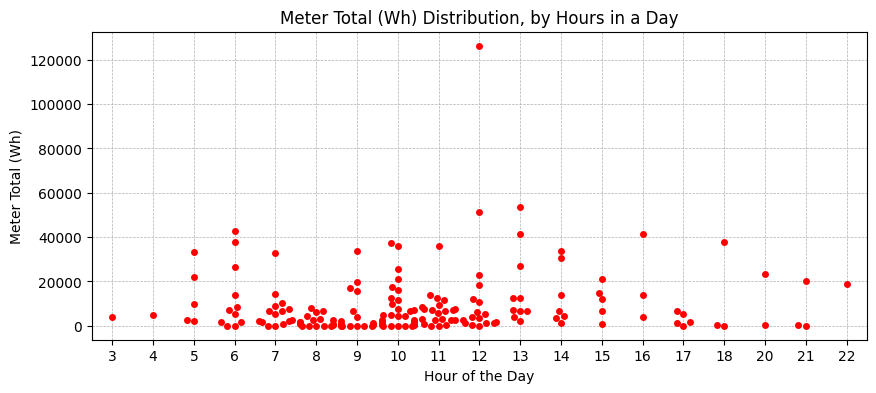

In [20]:
# inital distribution of meter graph
plt.figure(figsize=(10, 4))
ax = sns.swarmplot(data=charging_data_filtered, y='Meter Total(Wh)', x='Hour', color='red')
plt.title('Meter Total (Wh) Distribution, by Hours in a Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Meter Total (Wh)')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.savefig('fig/initial_meter_total_distribution.png')
plt.show()

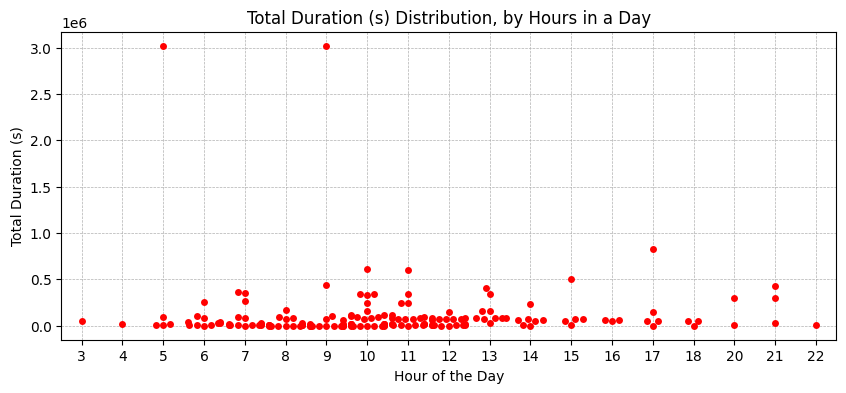

In [21]:
# inital distribution of distribution graph

plt.figure(figsize=(10, 4))
ax = sns.swarmplot(data=charging_data_filtered, y="Total Duration (s)", x='Hour', color='red')
plt.title('Total Duration (s) Distribution, by Hours in a Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Duration (s)')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.savefig('fig/initial_total_duration_distribution.png')
plt.show()

Ouliers are found here on both duration and meter total variables. They are removed for further analysis.

In [22]:
# remove the outlier
charging_data_filtered = charging_data_filtered[charging_data_filtered['Meter Total(Wh)'] <= 60000]
charging_data_filtered = charging_data_filtered[charging_data_filtered["Total Duration (s)"] <= 1e6]
charging_data_filtered.to_csv('data/charging_data_processed_wo_outlier.csv', index=False)

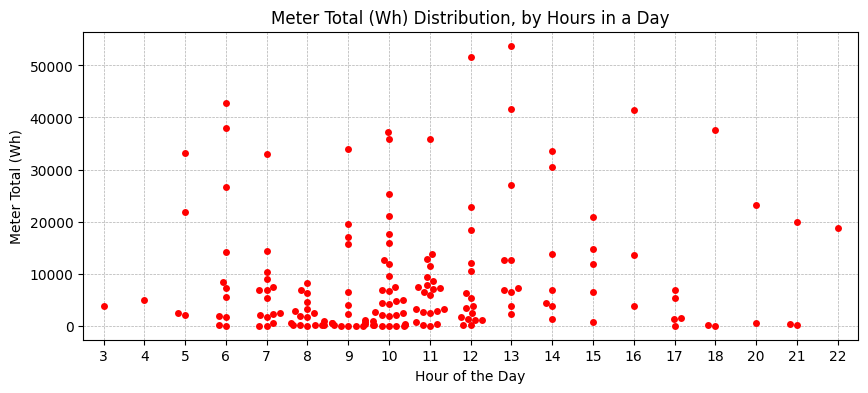

In [23]:
# filtered hourly meter distribution
plt.figure(figsize=(10, 4))
ax = sns.swarmplot(data=charging_data_filtered, y='Meter Total(Wh)', x='Hour', color='red')
plt.title('Meter Total (Wh) Distribution, by Hours in a Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Meter Total (Wh)')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.savefig('fig/filtered_meter_total_distribution_hour.png')
plt.show()

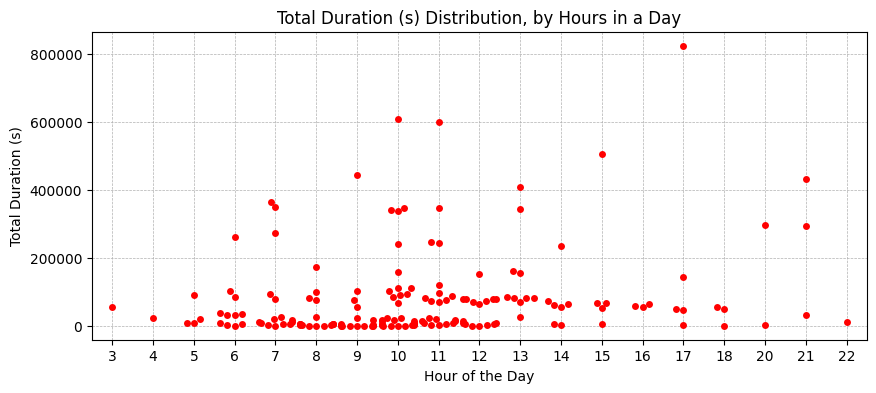

In [24]:
# filtered hourly total duration distribution
plt.figure(figsize=(10, 4))
ax = sns.swarmplot(data=charging_data_filtered, y="Total Duration (s)", x='Hour', color='red')
plt.title('Total Duration (s) Distribution, by Hours in a Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Duration (s)')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.savefig('fig/filtered_total_duration_distribution_hour.png')
plt.show()

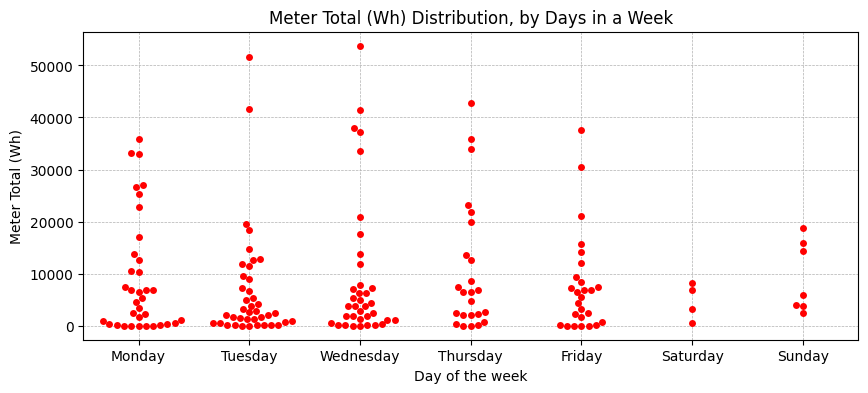

In [25]:
# filtered weekly meter distribution
plt.figure(figsize=(10, 4))
ax = sns.swarmplot(data=charging_data_filtered, y='Meter Total(Wh)', x='DayOfWeek', color='red')
plt.title('Meter Total (Wh) Distribution, by Days in a Week')
plt.xlabel('Day of the week')
plt.ylabel('Meter Total (Wh)')
ax.set_xticklabels(day_names)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.savefig('fig/filtered_meter_total_distribution_day.png')

plt.show()

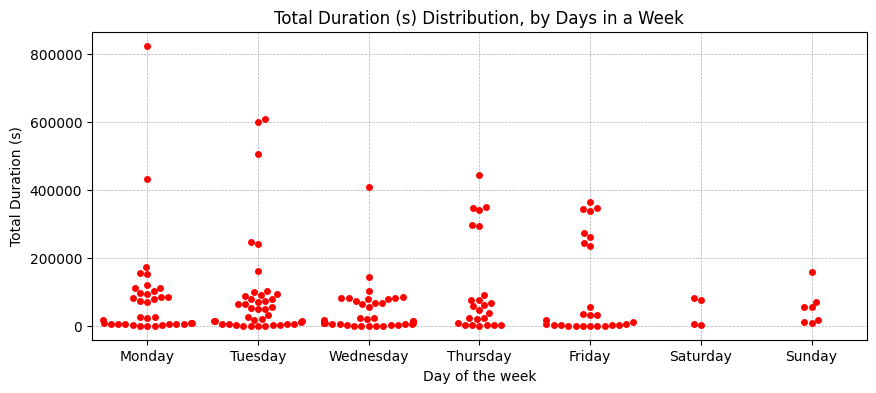

In [26]:
# filtered weekly total duration distribution
plt.figure(figsize=(10, 4))
ax = sns.swarmplot(data=charging_data_filtered, y='Total Duration (s)', x='DayOfWeek', color='red')
plt.title('Total Duration (s) Distribution, by Days in a Week')
plt.xlabel('Day of the week')
plt.ylabel('Total Duration (s)')
ax.set_xticklabels(day_names)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.savefig('fig/filtered_total_duration_distribution_day.png')

plt.show()

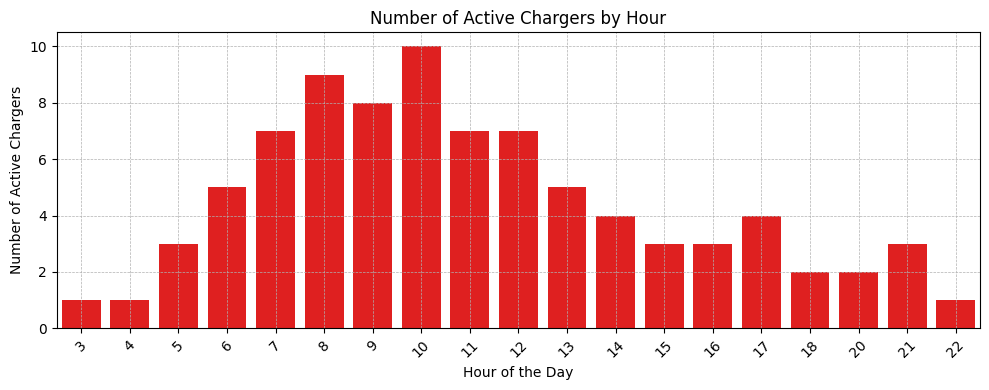

In [27]:
# active charger distribution by hour.
active_chargers_per_hour = charging_data_filtered.groupby('Hour')['Charger_name'].nunique().reset_index()
# Create a bar graph to show the number of active chargers for each hour
fig, ax = plt.subplots(figsize=(10, 4))
sns.barplot(data=active_chargers_per_hour, x='Hour', y='Charger_name', ax=ax, color='red')
ax.set_title('Number of Active Chargers by Hour')
ax.set_xlabel('Hour of the Day')
ax.set_ylabel('Number of Active Chargers')
plt.xticks(rotation=45)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.savefig('fig/active_charger_distribution_hour.png')
plt.tight_layout()
plt.show()

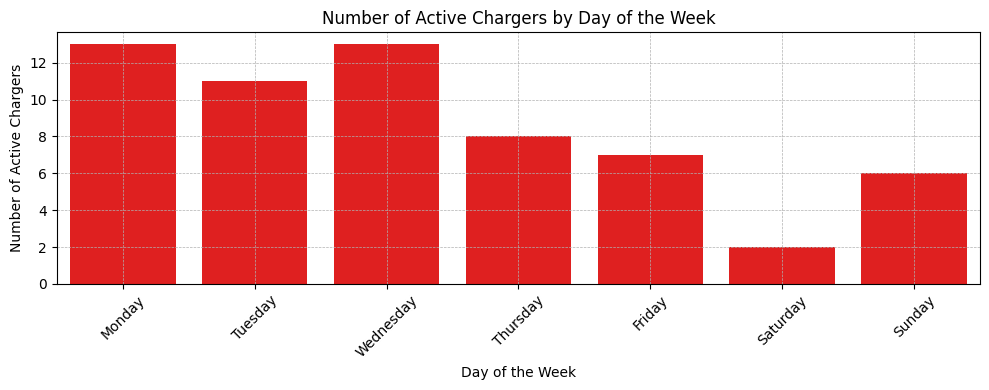

In [28]:
# active charger distribution by day.
active_chargers_per_hour = charging_data_filtered.groupby('DayOfWeek')['Charger_name'].nunique().reset_index()
fig, ax = plt.subplots(figsize=(10, 4))
sns.barplot(active_chargers_per_hour, x='DayOfWeek', y='Charger_name', ax=ax, color='red')
ax.set_title('Number of Active Chargers by Day of the Week')
ax.set_xlabel('Day of the Week')
ax.set_ylabel('Number of Active Chargers')
ax.set_xticklabels(day_names)
plt.xticks(rotation=45)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.savefig('fig/active_charger_distribution_day.png')
plt.tight_layout()
plt.show()

In [29]:
# sum all duration and meter total for the heatmap
hourly_data = charging_data_filtered.groupby(['Charger_name', 'Hour']).agg({
    'Total Duration (s)': 'sum',
    'Meter Total(Wh)': 'sum'
}).reset_index()

daily_data = charging_data_filtered.groupby(['Charger_name', 'DayOfWeek']).agg({
    'Total Duration (s)': 'sum',
    'Meter Total(Wh)': 'sum'
}).reset_index()

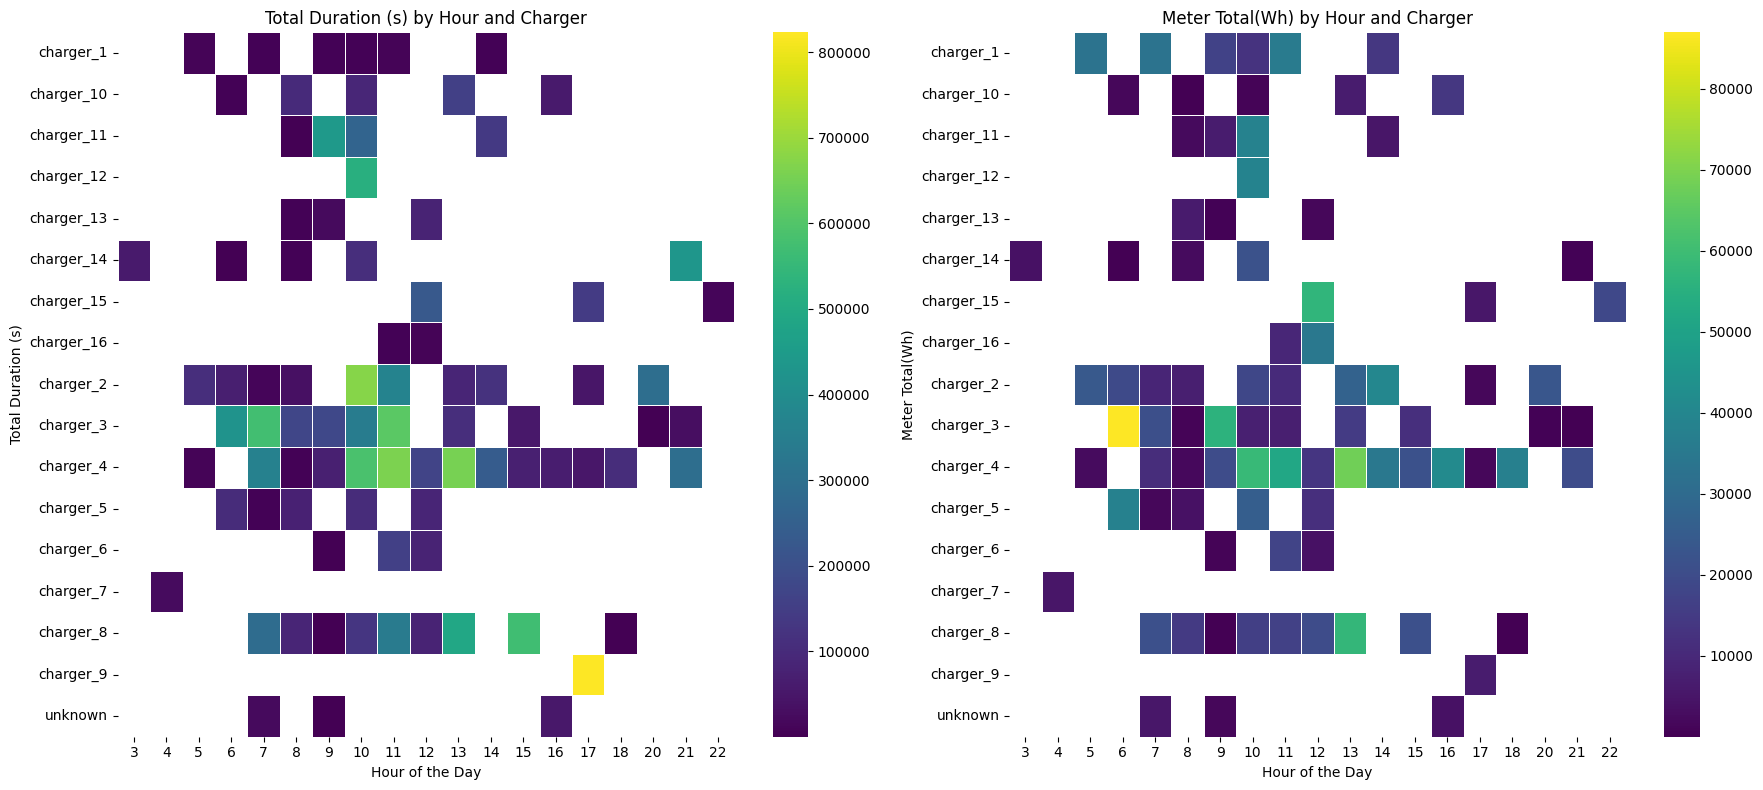

In [30]:
# Pivot data for heatmap
duration_pivot = hourly_data.pivot(index="Charger_name", columns="Hour", values="Total Duration (s)")
meter_total_pivot = hourly_data.pivot(index="Charger_name", columns="Hour", values="Meter Total(Wh)")

# Create heatmaps
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 8))

# Heatmap for Total Duration and Meter Total | by Hours
sns.heatmap(duration_pivot, linewidths=.5, ax=axes[0], cmap='viridis')
axes[0].set_title('Total Duration (s) by Hour and Charger')
axes[0].set_xlabel('Hour of the Day')
axes[0].set_ylabel('Total Duration (s)')
sns.heatmap(meter_total_pivot, linewidths=.5, ax=axes[1], cmap='viridis')
axes[1].set_title('Meter Total(Wh) by Hour and Charger')
axes[1].set_xlabel('Hour of the Day')
axes[1].set_ylabel('Meter Total(Wh)')
plt.tight_layout()
plt.savefig('fig/heatmap_hour.png')

plt.show()

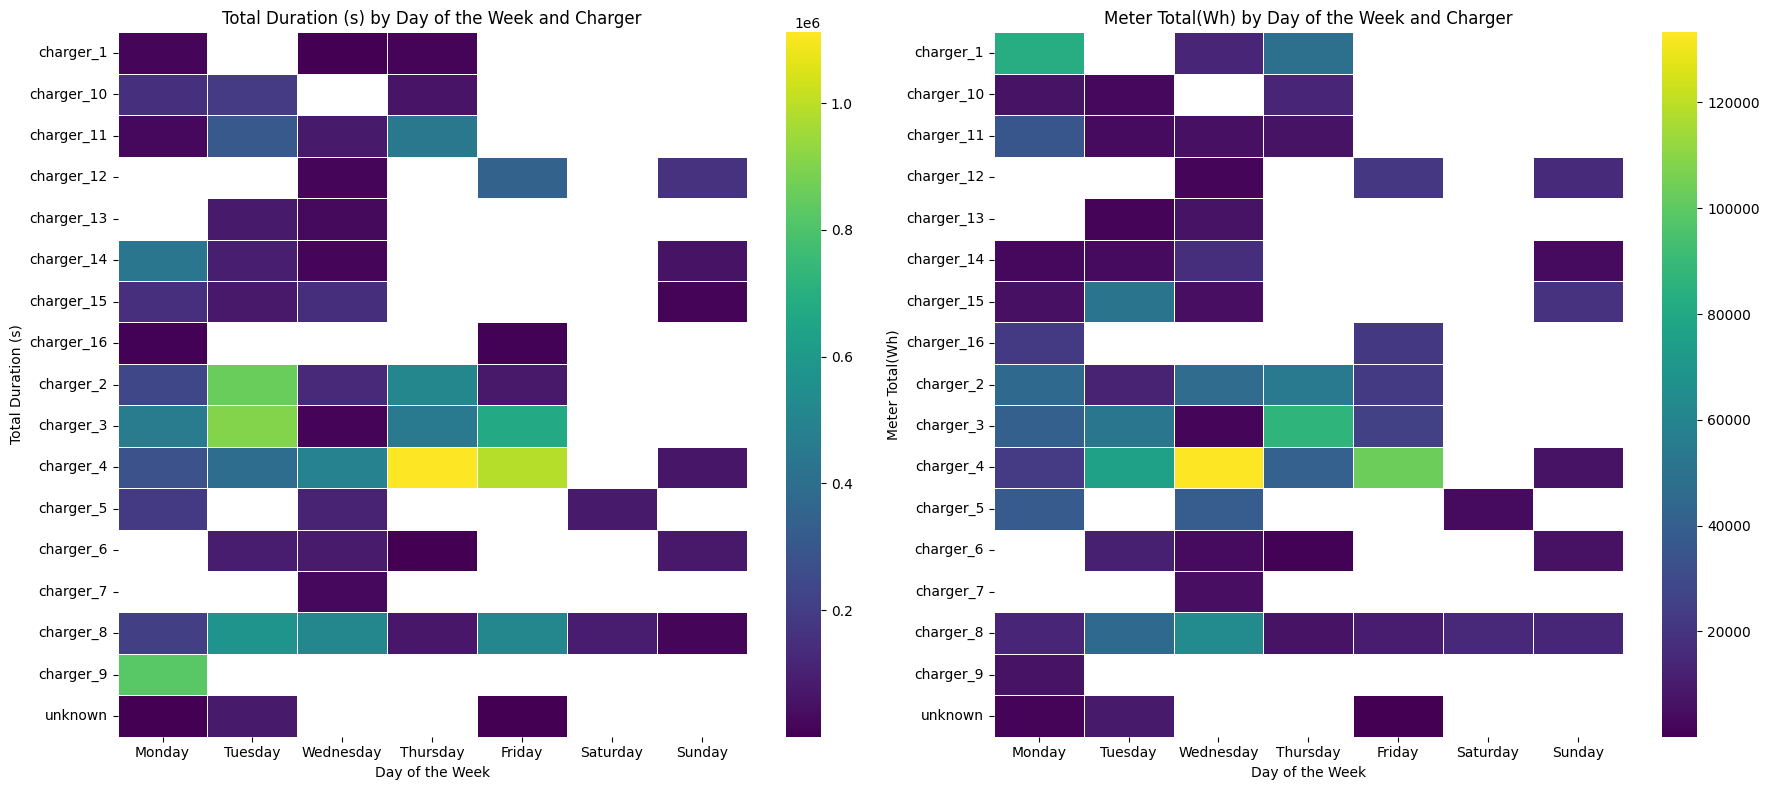

In [31]:
# Pivot data for heatmap
duration_pivot = daily_data.pivot(index="Charger_name", columns="DayOfWeek", values="Total Duration (s)")
meter_total_pivot = daily_data.pivot(index="Charger_name", columns="DayOfWeek", values="Meter Total(Wh)")

# Create heatmaps
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 8))

# Heatmap for Total Duration and Meter Total | by Days
sns.heatmap(duration_pivot, linewidths=.5, ax=axes[0], cmap='viridis')
axes[0].set_title('Total Duration (s) by Day of the Week and Charger')
axes[0].set_xticklabels(day_names)
axes[0].set_xlabel('Day of the Week')
axes[0].set_ylabel('Total Duration (s)')

sns.heatmap(meter_total_pivot, linewidths=.5, ax=axes[1], cmap='viridis')
axes[1].set_title('Meter Total(Wh) by Day of the Week and Charger')
axes[1].set_xticklabels(day_names)
axes[1].set_xlabel('Day of the Week')
axes[1].set_ylabel('Meter Total(Wh)')
plt.tight_layout()

plt.savefig('fig/heatmap_day.png')

plt.show()

In [32]:
hourly_data = charging_data_filtered.groupby(['Charger_name', 'Hour']).agg({
    'Total Duration (s)': 'mean',
    'Meter Total(Wh)': 'mean'
}).reset_index()

daily_data = charging_data_filtered.groupby(['Charger_name', 'DayOfWeek']).agg({
    'Total Duration (s)': 'mean',
    'Meter Total(Wh)': 'mean'
}).reset_index()

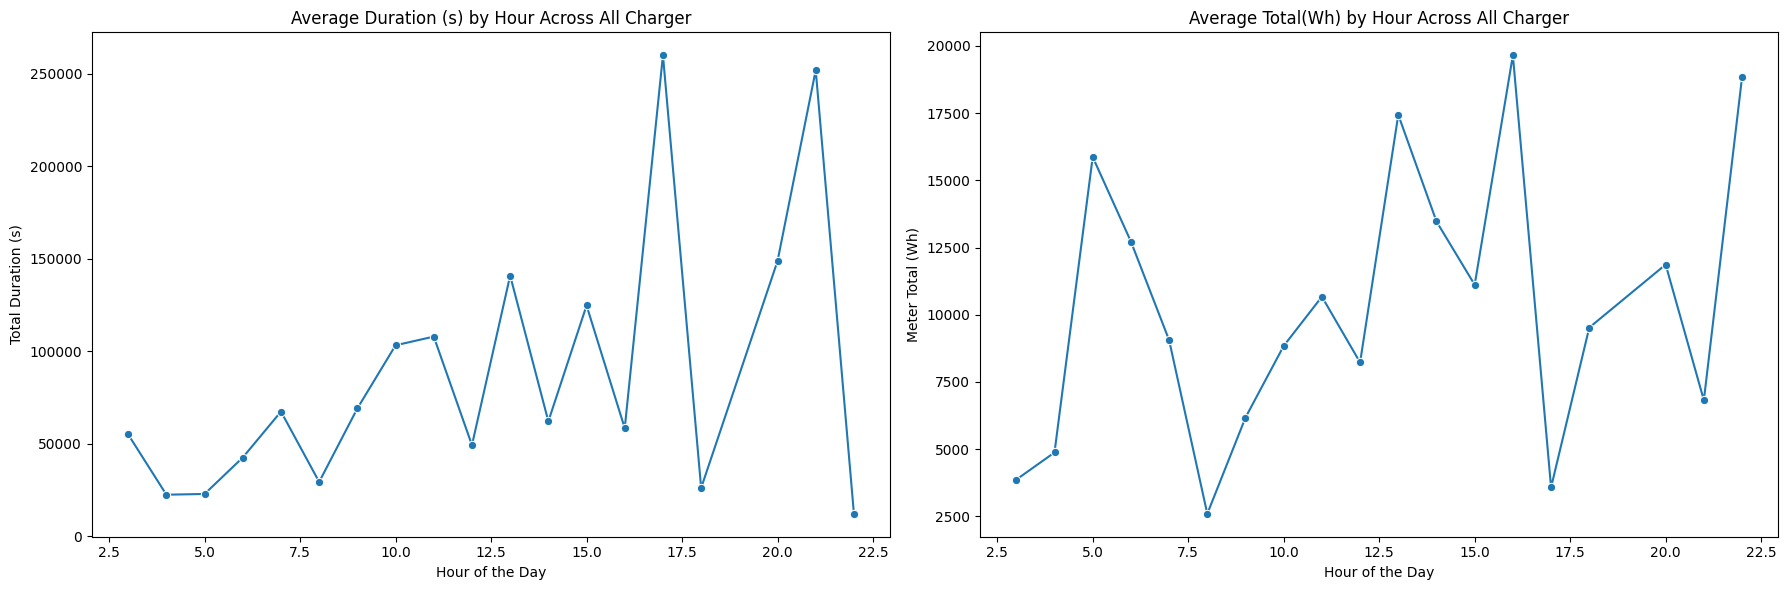

In [33]:
# Create a pivot table for the heatmap of the overall data
overall_duration_pivot = hourly_data.pivot_table(index='Hour', values='Total Duration (s)', aggfunc='mean').reset_index()
overall_meter_total_pivot = hourly_data.pivot_table(index='Hour', values='Meter Total(Wh)', aggfunc='mean').reset_index()

# Recreate figure for line graphs only, removing heatmaps
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

# Line graph for overall Total Duration and Meter Total
sns.lineplot(data=overall_duration_pivot, x='Hour', y='Total Duration (s)', ax=axes[0], marker='o')
axes[0].set_title('Average Duration (s) by Hour Across All Charger')
axes[0].set_xlabel('Hour of the Day')
axes[0].set_ylabel('Total Duration (s)')

sns.lineplot(data=overall_meter_total_pivot, x='Hour', y='Meter Total(Wh)', ax=axes[1], marker='o')
axes[1].set_title('Average Total(Wh) by Hour Across All Charger')
axes[1].set_xlabel('Hour of the Day')
axes[1].set_ylabel('Meter Total (Wh)')
plt.savefig('fig/avg_hour.png')

plt.tight_layout()
plt.show()

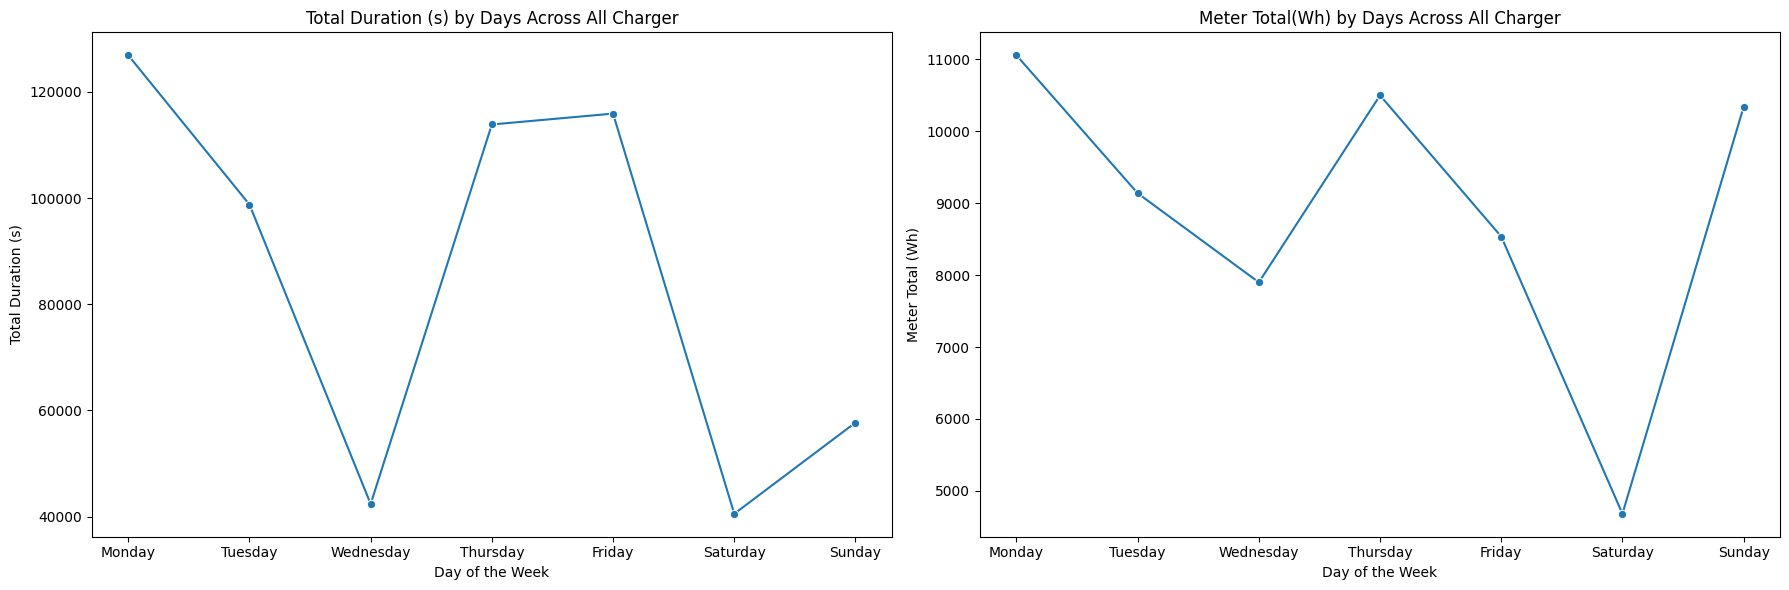

In [34]:
# Create a pivot table for the heatmap of the overall data
overall_duration_pivot = daily_data.pivot_table(index='DayOfWeek', values='Total Duration (s)', aggfunc='mean').reset_index()
overall_meter_total_pivot = daily_data.pivot_table(index='DayOfWeek', values='Meter Total(Wh)', aggfunc='mean').reset_index()

# Recreate figure for line graphs only, removing heatmaps
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

# Line graph for overall Total Duration and Meter Total
sns.lineplot(data=overall_duration_pivot, x='DayOfWeek', y='Total Duration (s)', ax=axes[0], marker='o')
axes[0].set_title('Total Duration (s) by Days Across All Charger')
axes[0].set_xlabel('Day of the Week')
axes[0].set_ylabel('Total Duration (s)')
axes[0].set_xticks(range(7))
axes[0].set_xticklabels(day_names)


sns.lineplot(data=overall_meter_total_pivot, x='DayOfWeek', y='Meter Total(Wh)', ax=axes[1], marker='o')
axes[1].set_title('Meter Total(Wh) by Days Across All Charger')
axes[1].set_xlabel('Day of the Week')
axes[1].set_ylabel('Meter Total (Wh)')
axes[1].set_xticks(range(7))
axes[1].set_xticklabels(day_names)
plt.savefig('fig/avg_day.png')

plt.tight_layout()
plt.show()

In [35]:
# generate an intial data report for the unfiltered dataset.
profile = ProfileReport(charging_data_filtered,title="Processed Charging Report", explorative=True)
profile.to_file("data_report/Processed_Charging_Report_wo_outlier.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]